In [37]:
import pandas as pd

file_path = 'DATA201/2021-2022 Football Player Stats.csv'

# Try utf-8 first, fallback to latin1 if it fails (Fix using CHATGPT)
encodings_to_try = ['utf-8', 'utf-8-sig', 'latin1', 'cp1252']

for enc in encodings_to_try:
    try:
        Player_Stats = pd.read_csv(file_path, delimiter=';', encoding=enc)
        print(f"Successfully loaded with encoding: {enc}")
        print(Player_Stats.shape)
        print(Player_Stats.head())
        break
    except UnicodeDecodeError as e:
        print(f"Failed with encoding {enc}: {e}")

Failed with encoding utf-8: 'utf-8' codec can't decode byte 0xf1 in position 10: invalid continuation byte
Failed with encoding utf-8-sig: 'utf-8' codec can't decode byte 0xc9 in position 3669: invalid continuation byte
Successfully loaded with encoding: latin1
(2921, 143)
   Rk             Player Nation Pos          Squad            Comp   Age  \
0   1         Max Aarons    ENG  DF   Norwich City  Premier League  22.0   
1   2   Yunis Abdelhamid    MAR  DF          Reims         Ligue 1  34.0   
2   3  Salis Abdul Samed    GHA  MF  Clermont Foot         Ligue 1  22.0   
3   4    Laurent Abergel    FRA  MF        Lorient         Ligue 1  29.0   
4   5        Charles Abi    FRA  FW  Saint-Étienne         Ligue 1  22.0   

   Born  MP  Starts  ...   Off   Crs  TklW  PKwon  PKcon    OG  Recov  AerWon  \
0  2000  34      32  ...  0.03  1.41  1.16    0.0   0.06  0.03   5.53    0.47   
1  1987  34      34  ...  0.00  0.06  1.39    0.0   0.03  0.00   6.77    2.02   
2  2000  31      29  ...  

C:\Users\Angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


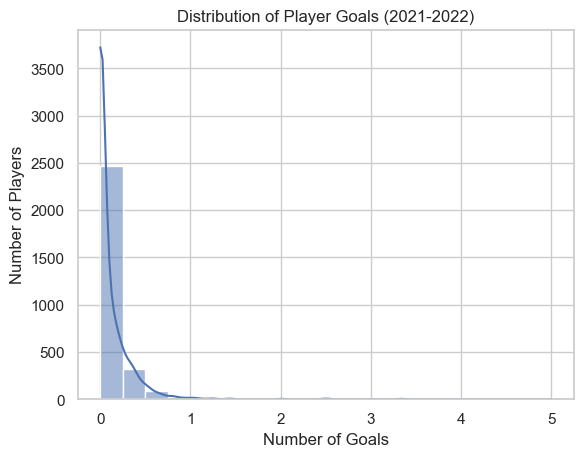

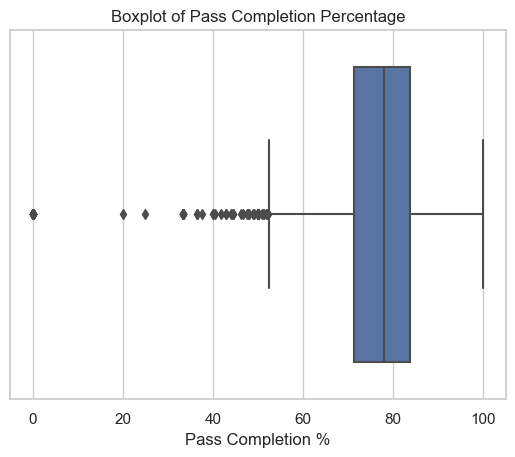

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.histplot(Player_Stats['Goals'], bins=20, kde=True)
plt.title('Distribution of Player Goals (2021-2022)')
plt.xlabel('Number of Goals')
plt.ylabel('Number of Players')
plt.show()

sns.set(style="whitegrid")
sns.boxplot(x=Player_Stats['PasTotCmp%'])
plt.title('Boxplot of Pass Completion Percentage')
plt.xlabel('Pass Completion %')
plt.show()

C:\Users\Angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


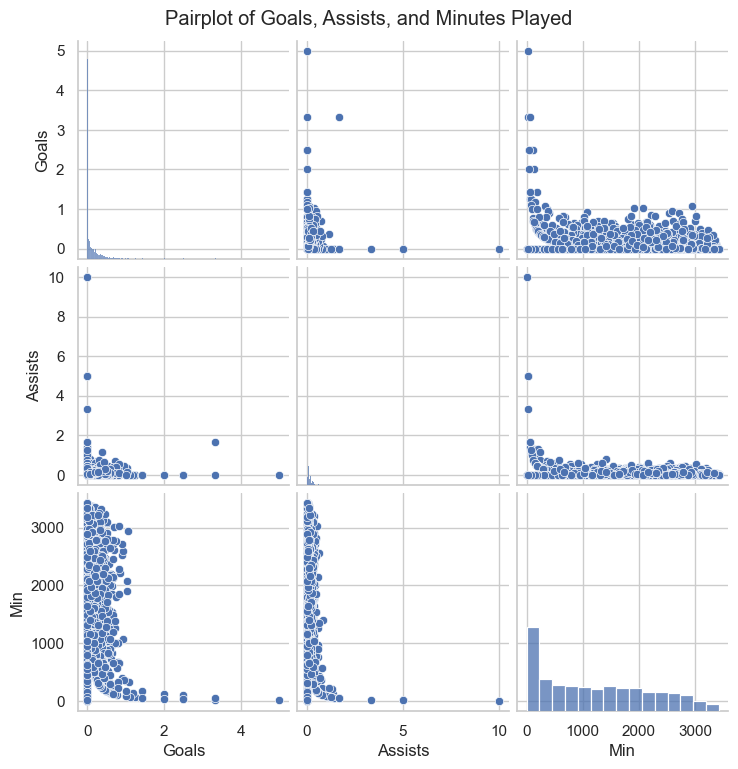

In [55]:
sns.set(style="whitegrid")
sns.pairplot(Player_Stats[['Goals', 'Assists', 'Min']].dropna())
plt.suptitle('Pairplot of Goals, Assists, and Minutes Played', y=1.02)
plt.show()

C:\Users\Angel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


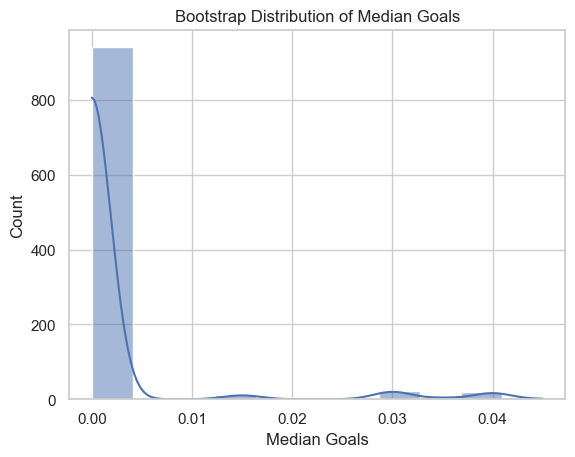

Estimated Median: 0.0
95% Confidence Interval: [0.   0.03]


In [51]:
import numpy as np

sample = Player_Stats.sample(frac=0.1, random_state=1)
boot_medians = [sample.sample(frac=1, replace=True)['Goals'].median() for _ in range(1000)]

sns.set(style="whitegrid")
sns.histplot(boot_medians, kde=True)
plt.title('Bootstrap Distribution of Median Goals')
plt.xlabel('Median Goals')
plt.show()

# Summary Statistics
print(f"Estimated Median: {np.median(boot_medians)}")
print(f"95% Confidence Interval: {np.percentile(boot_medians, [2.5, 97.5])}")